In [1]:
## Run in python 2.7+
# Script for all sensor data

import sys

import arable
from   arable.client     import ArableClient 
a = ArableClient()
from   sensor_includes   import email, password_ccber, tenant_ccber

a.connect(email = email, password = password_ccber, tenant = tenant_ccber)

import re
import matplotlib.pyplot as plt
import numpy             as np
import matplotlib.dates  as mdates
import altair            as alt

# Enable altair usage in Jupyter Notebook
alt.renderers.enable('notebook')

from   datetime          import timedelta
from   datetime          import datetime

dt = datetime.now()

import pandas            as     pd
from   pandas.plotting   import register_matplotlib_converters

register_matplotlib_converters()

from   io                import StringIO

import arable_data_dict  as dd

In [2]:
# Datetime object to string with format "%Y-%m-%dT%H:%M:%SZ"
def dt_to_ymd_hms(x):
    return x.strftime("%Y-%m-%dT%H:%M:%SZ")
# Append string with format "%Y-%m-%dT%H:%M:%SZ" to list
def append_ymd_hms(a, b):
    a.append(dt_to_ymd_hms(b))
# Reverses dt_to_ymd_hms
def ymd_hms_to_dt(x):
    try:
        return datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    except:
        return datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ")

# Datetime object to string with format "%Y-%m-%d"
def dt_to_ymd(x):
    return x.strftime("%Y-%m-%d")
# Reverse dt_to_ymd
def ymd_to_dt(x):
    return datetime.strptime(x, "%Y-%m-%d")

# Datetime object to string with format "%Y-%m"
def dt_to_ym(x):
    return x.strftime("%Y-%m")
# Append string with format "%Y-%m" to list
def append_ym(a, b):
    try:
        a.append(dt_to_ym(b))
    except:
        a.append(dt_to_ym(ym_to_dt(b)))
# Reverse dt_to_ym
def ym_to_dt(x):
    return datetime.strptime(x, "%Y-%m")

# Append string to list
def append_string(a, b):
    a.append(str(b))
    
# Append temporary lists to list
def append_temp_list(temp_list, main_list):
    main_list.append(temp_list)

In [40]:
def arable_query(s, b, c, d, e, f, g):
    dev = "['" + str(c) + "']"
    df = a.query( select = str(s),
                  format = str(b),
                 devices = dev,
                 measure = str(d),
                   order = str(e),
                     end = f,
                   start = g,
                   limit = 100000000)
    df = StringIO(df)
    df = pd.read_csv(df, sep=',', error_bad_lines=False)
    return df

start_current_month = ym_to_dt(dt_to_ym(dt)).replace(day=1)
today = dt

In [ ]:
device_created = pd.read_csv(str('Sensor-Info_' + str(dt_to_ymd(dt)) + '.txt'), sep = ",")['Date Created'].values.tolist() 
# Monthly
m_start    = []
m_start_fn = []
m_end      = []
m_end_fn   = []

# Yearly
y_start    = []
y_start_fn = []
y_end      = []
y_end_fn   = []

# All Time
astart     = []
start_fn   = []
end        = []
end_fn     = []

for j in range(len(device_created)):
    ms  = []
    msf = []
    me  = []
    mef = []
    
    ys  = []
    ysf = []
    ye  = []
    yef = []
    
    s   = []
    sf  = []
    e   = []
    ef  = []
    
    def new_month(new_m):
        append_ymd_hms(ms, new_m)
        append_string(me, new_m)
        append_ym(msf, new_m)  
        append_ym(mef, new_m)
        
    def new_year(new_y):
        append_ymd_hms(ys, new_y)
        append_string(ye, new_y)
        append_ym(ysf, new_y)
        append_ym(yef, new_y)
    
    device_created_ymd = (device_created[j])[:10]
    start              = ymd_to_dt(device_created_ymd)
    append_string(ms, start)
    append_string(ys, start)
    append_string(s, start)
    append_ym(msf, start)
    append_ym(ysf, start)
    append_ym(sf, start)
    
    start  = start.replace(day=1)
    
    if start.year == dt.year:
        for i in range(start.month+1, dt.month+1):
            new_month(start.replace(month=i))
    
    elif start.year != dt.year: 
        for i in range(dt.year-start.year):
            for j in range(start.month+1, 13): 
                new_month(start.replace(month=j))
        for i in range(start.year+1, dt.year+1):
            newyr = start.replace(year=i, month=1)
            new_year(newyr)
            for j in range(1, dt.month+1):
                new_month(newyr.replace(month=j))
    
    append_string(me, dt)
    append_string(ye, dt)
    append_string(e, dt)
    append_ym(mef, dt)
    append_ym(yef, dt)
    append_ym(ef, dt)
    
    append_temp_list(ms, m_start)
    append_temp_list(me, m_end)
    append_temp_list(msf, m_start_fn)
    append_temp_list(mef, m_end_fn)
    
    append_temp_list(ys, y_start)
    append_temp_list(ye, y_end)
    append_temp_list(ysf, y_start_fn)
    append_temp_list(yef, y_end_fn)
    
    append_temp_list(s, astart)
    append_temp_list(e, end)
    append_temp_list(sf, start_fn)
    append_temp_list(ef, end_fn)

In [5]:
Sensor_ID            = ['A000229','A000318','A000369','A000465','A000466','A000502','A000507','A000513','A000522','A000536','A000546','A000563']
Site                 = ['Campus_Lagoon','Campus_Lagoon','North_Campus_Open_Space','Campus_Lagoon','North_Campus_Open_Space','North_Campus_Open_Space','Nipomo_Lupine_Project','Nipomo_Lupine_Project','Nipomo_Lupine_Project','Campus_Lagoon','North_Campus_Open_Space','North_Campus_Open_Space']
Site_Types           = ['Campus_Lagoon','North_Campus_Open_Space','Nipomo_Lupine_Project']
Habitat              = ['Annual_Grass','Coastal_Sage_Scrub','Ventura_Marsh_Milk-Vetch','Campus_Point_Iceplant','Salt_Marsh','North_Slope_Oaks','Black_Lake_Gentle_South','Black_Lake_North_Facing','Philips_66','2016_Burn_Plot','2017_Stipa_Drillseed','Stipa_Loam']
Habitat_Types        = ['Annual_Grass','Coastal_Sage_Scrub','Ventura_Marsh_Milk-Vetch','Campus_Point_Iceplant','Salt_Marsh','North_Slope_Oaks','Black_Lake_Gentle_South','Black_Lake_North_Facing','Philips_66','2016_Burn_Plot','2017_Stipa_Drillseed','Stipa_Loam']

Select site: 
1 Campus Lagoon
2 North Campus Open Space
3 Nipomo Lupine Project
[1-3]3


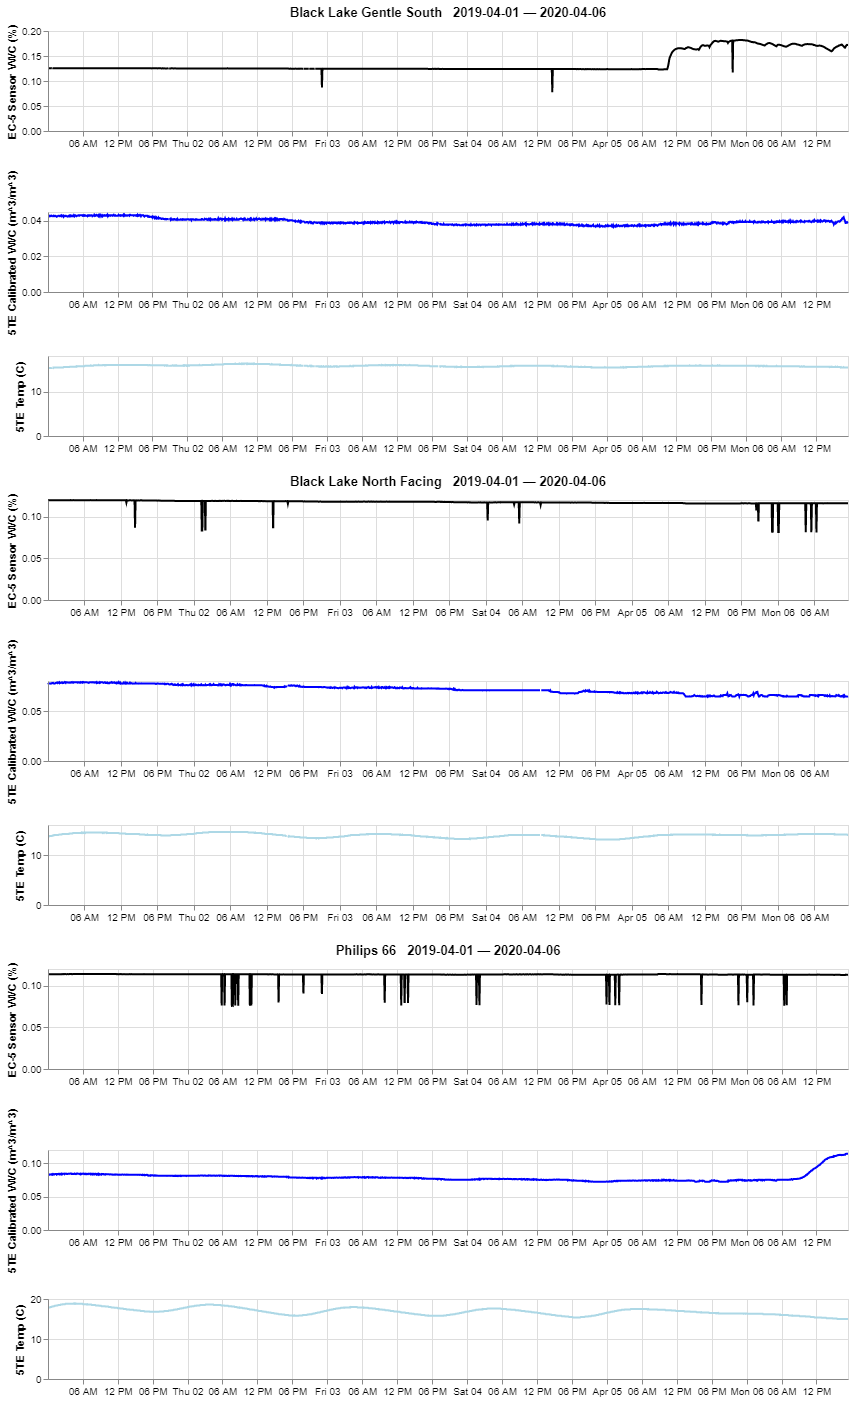

In [33]:
# Make soil data charts for total sensor lifetime
print('Select site: ')
for i in range(len(Site_Types)):
    j = int(i)+1
    print(str('{:<2d}'.format(j) + '{:<8}'.format(Site_Types[i])).replace("_", " "))
Select_Site = int(input(str('[1-' + str(len(Site_Types))) + ']'))-1

import os
#dirpath = 'C:/Users/ccber-arables/Box/'
dirpath = 'C:/Users/15303/Documents/'
#df = pd.read_csv()
# Altair displays a maximum of 5000 data points...
# If we are looking at all hourly data, we need to disable this
# But Jupyter Notebook will suffer
alt.data_transformers.disable_max_rows()

charts = []
for i in range(len(Sensor_ID)):
    if Site[i]==Site_Types[Select_Site]:
        filepath = dirpath + Site[i] + '/' + Habitat[i] + '/'
        years = os.listdir(filepath)
        for j in years:
            yrfilepath = filepath + str(j) + '/Soil/'
            files = os.listdir(yrfilepath)
            start_month = []
            dfs         = []
            for k in files:
                start_month.append(datetime.strptime(k.split('_')[-2], "%Y-%m"))
                fn = yrfilepath + k
                dfs.append(pd.read_csv(fn))
            start_current_month = ym_to_dt(dt_to_ym(dt)).replace(day=1)
            today = dt
            end_month = []
            for l in start_month:
                if l != start_current_month:
                    try:
                        end_month.append(l.replace(month=l.month+1)) 
                    except:
                        end_month.append(l.replace(year=l.year+1).replace(month=1))
                else:
                    end_month.append(today)
            for m in range(len(files)):
                df = dfs[m]
                df['Time'] = pd.to_datetime(df['Time'],infer_datetime_format=True)
                base = alt.Chart(df, 
                         title = str(Habitat[i]).replace("_", " ") + ' \n ' + str(start)[:10] + ' — ' + str(end)[:10]
                ).mark_line(color = 'black'
                ).properties(width  = 800, 
                             height = 100
                ).encode(x = alt.X('Time:T', axis=alt.Axis(title='')),
                         y = alt.Y('EC-5 Sensor VWC (%):Q', axis=alt.Axis(title='EC-5 Sensor VWC (%)')))
                z = alt.Chart(df, 
                ).mark_line(color = 'blue'
                ).properties(width  = 800,
                             height = 80
                ).encode(x = alt.X('Time:T', axis=alt.Axis(title='')),
                         y = alt.Y('5TE Calibrated VWC (m^3/m^3):Q', axis=alt.Axis(title='5TE Calibrated VWC (m^3/m^3)')))
                q = alt.Chart(df, 
                ).mark_line(color = 'lightblue'
                ).properties(width  = 800,
                             height = 80
                ).encode(x = alt.X('Time:T', axis=alt.Axis(title='')),
                         y = alt.Y('5TE Temp (C):Q', axis=alt.Axis(title='5TE Temp (C)')))
                graph = alt.vconcat(base, z, q)
                charts.append(graph)
alt.vconcat(*charts)

In [ ]:
# Make hourly temperature charts for total sensor lifetime
print('Select site: ')
for i in range(len(Site_Types)):
    j = int(i)+1
    print(str('{:<2d}'.format(j) + '{:<8}'.format(Site_Types[i])).replace("_", " "))
Select_Site = int(input(str('[1-' + str(len(Site_Types))) + ']'))-1

# Altair displays a maximum of 5000 data points...
# If we are looking at all hourly data, we need to disable this
# But Jupyter Notebook will suffer
alt.data_transformers.disable_max_rows()

charts = []
for i in range(len(Sensor_ID)):
    if Site[i]==Site_Types[Select_Site]:
        end = m_end[i][-1]
        start = m_start[i][-int(len(m_start[i])-1)]
        df = arable_query('all', 'csv', Sensor_ID[i], "aux_raw", "time", end, start)
        df['time'] = pd.to_datetime(df['time'],infer_datetime_format=True)
        base = alt.Chart(df, 
                         title = str(Habitat[i]).replace("_", " ") + ' \n ' + str(start)[:10] + ' — ' + str(end)[:10]
                ).mark_line(color = 'black'
                ).properties(width  = 800, 
                             height = 100
                ).encode(x = alt.X('time:T', axis=alt.Axis(title='')),
                         y = alt.Y('sdi12_value_0:Q', axis=alt.Axis(title='5TE raw VWC (dielectric permittivity)')))
        z = alt.Chart(df, 
                ).mark_line(color = 'blue'
                ).properties(width  = 800,
                             height = 80
                ).encode(x = alt.X('time:T', axis=alt.Axis(title='')),
                         y = alt.Y('sdi12_value_2:Q', axis=alt.Axis(title='5TE Calibrated VWC (m^3/m^3)')))
        q = alt.Chart(df, 
                ).mark_line(color = 'lightblue'
                ).properties(width  = 800,
                             height = 80
                ).encode(x = alt.X('time:T', axis=alt.Axis(title='')),
                         y = alt.Y('analog:Q', axis=alt.Axis(title='5TE Temp (C)')))
        graph = alt.vconcat(base, z, q)
        charts.append(graph)

alt.vconcat(*charts)

Select site: 
1 Campus Lagoon
2 North Campus Open Space
3 Nipomo Lupine Project
[1-3]3


### 